# Compare the performance of models (loss/accuracy, latency)

The models to compare will  be:
* ResNet18
* ResNet50
* VGG16
* MobileNetV3 - small
* MobileNetV3 - large
* EfficientNet

In [1]:
from pathlib import Path
import pandas as pd
from timeit import default_timer as timer

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from VGGs import *
from MobileNetV3 import *
from engine import *

change_to_disk()
data_dir = Path("split_1k/")
saves = Path('Trainning_results_saves/')
check_dir(saves)

In [2]:
data_transform = transforms.Compose([
    # Resize our images to 224x224
    transforms.Resize(size=(224, 224)),
    # Flip the images randomly on the horizontal and vertical (just to make it as independent from the position of the pipeline)
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor(),
    
    # Normalize
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

BATCH_SIZE = 32
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

In [3]:
# Things to play with
# Hyperparameters -> NUM_EPOCHS - 100 | Learning_rate - 0.001 
# Functions -> Optimizer - Rprop | Loss Function - Cross Entropy Loss

NUM_EPOCHS = 2
lr = 0.001
device = get_device()

resnet18 = ResNet18()
resnet50 = ResNet50()
vgg16 = VGG16()
mobnet_sml = MobileNetV3("small")
mobnet_lrg = MobileNetV3("large")

loss_fn = nn.CrossEntropyLoss()

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5563 | train_acc: 0.7502 | validation_loss: 1.5300 | validation_acc: 0.5176
Epoch: 2 | train_loss: 0.4083 | train_acc: 0.8245 | validation_loss: 29.2089 | validation_acc: 0.2188
ResNet18 Results


(None,
 <function utils.plot_confusion_matrix(model, dataloader, device, classes)>)

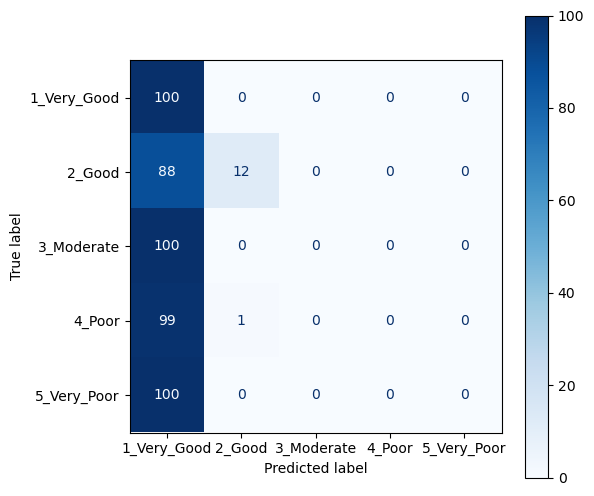

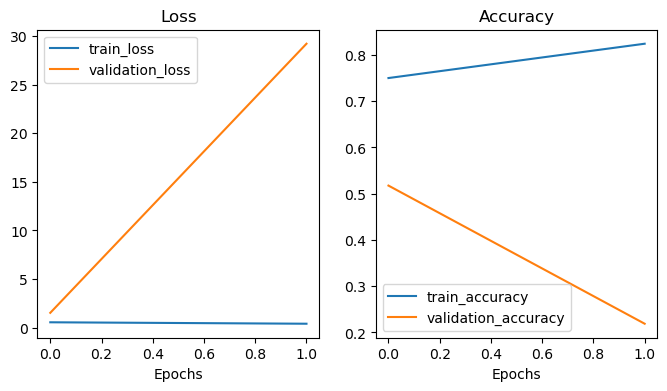

In [4]:
#Train ResNet18
resnet18.to(device)
nadam_optim = torch.optim.NAdam(params=resnet18.parameters(), lr=lr)
train_resnet18_results, train_time_resnet18 = train(resnet18, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, device=device)

plot_confusion_matrix(resnet18, test_dl, device, class_names)
print(f"ResNet18 Results")
plot_loss_curves(train_resnet18_results), plot_confusion_matrix

In [5]:
results_resnet18 = eval_model(model = resnet18, data_loader = test_dl, loss_fn = loss_fn, accuracy_fn = accuracy_fn, device = device, dummy_input = torch.rand(32,3,224,224).to(device))
results_resnet18

  0%|          | 0/16 [00:03<?, ?it/s]

{'model_name': 'ResNet',
 'model_loss': 30.171436309814453,
 'model_acc': 21.6796875,
 'model_inf_time': 28.687358140945435}